In [1]:
import scipy as sc
import numpy as np
from scipy.special import airy

In [2]:
# Constants

Beta = 1 / np.pi  # Beta = k / (ħ * ω)

In [3]:
def lambd(n):
    if n == 1:
        n = 1.01735
    elif n == 3:
        n = 3.0079
    return np.sqrt(2 * n + 1)

def En(n):
    if n == 1:
        n = 1.01735
    elif n == 3:
        n = 3.0079
    return (n + 1 / 2) * np.pi

#En = (n + 1/2) * ħ * ω (постоянная Планка-Дирака на частоту)
#lambda = 2 * En / (ħ * ω)

In [4]:
def k_squared(n, y):
    return lambd(n) ** 2 - y ** 2

def k_pretty_squared(n, y):
    return y ** 2 - lambd(n) ** 2

In [5]:
def Xi_2b(n, y):
    a = np.pi - 2 * np.arctan(y / np.sqrt(k_squared(n, y)))
    a = a * (lambd(n) ** 2)
    a += -2 * y * np.sqrt(k_squared(n, y))
    a = np.power(np.abs(a), 2/3) * (-np.power(3, 2/3) / 4)
    return a

def Xi_3(n, y):
    a = lambd(n) / (y * np.sqrt(k_pretty_squared(n,y)))
    a = np.log(a) * lambd(n) ** 2
    a += y * np.sqrt(k_pretty_squared(n, y))
    a = np.power(np.abs(a), 2/3)
    a = a * np.power(3, 2/3) / np.power(2, 4/3)
    return a

In [6]:
Xi_3(3, 2.64)

D:\Anaconda\envs\CarRace\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
D:\Anaconda\envs\CarRace\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


nan

In [7]:
def const_s(n):
    a = np.sqrt(2) * np.power(En(n), 1/6)
    b = np.power(np.abs(En(n)), 4/3) * np.power(3 * np.pi, 2/3) * (-1/4)
    b, _, _, _ = airy(b)
    b = b * np.sqrt(Beta) * np.power(3 * np.pi, 1/6)
    return a / b

def const_a(n):
    a = np.power(En(n), 7/6) * np.power(3 * np.pi, 1/6)
    b = np.power(np.abs(En(n)), 4/3) * np.power(3 * np.pi, 2/3)
    Ai, Aip, _, _ = airy(-b / 4)
    b = np.sqrt(2 * Beta ** 3) * (b * Aip - Ai)
    return a / b

In [8]:
def wave_s(n, y):
    if y < lambd(n):
        Ai, _, _, _ = airy(Xi_2b(n, y))
        denominator = np.power(np.abs(Xi_2b(n, y)), 1/4) / np.power(np.abs(k_squared(n, y)), 1/4)
        a = const_s(n) * denominator * Ai
    elif y >= lambd(n):
        Ai, _, _, _ = airy(Xi_3(n, y))
        denominator = np.power(np.abs(Xi_3(n, y)), 1/4) / np.power(np.abs(k_squared(n, y)), 1/4)
        a = const_s(n) * denominator * Ai
    return a

def wave_a(n, y):
    if y < lambd(n):
        Ai, _, _, _ = airy(Xi_2b(n, y))
        denominator = np.power(np.abs(Xi_2b(n, y)), 1/4) / np.power(np.abs(k_squared(n, y)), 1/4)
        a = const_a(n) * denominator * Ai
    elif y >= lambd(n):
        Ai, _, _, _ = airy(Xi_3(n, y))
        denominator = np.power(np.abs(Xi_3(n, y)), 1/4) / np.power(np.abs(k_squared(n, y)), 1/4)
        a = const_a(n) * denominator * Ai
    return -a

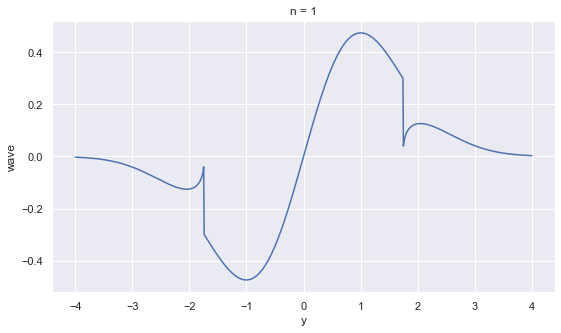

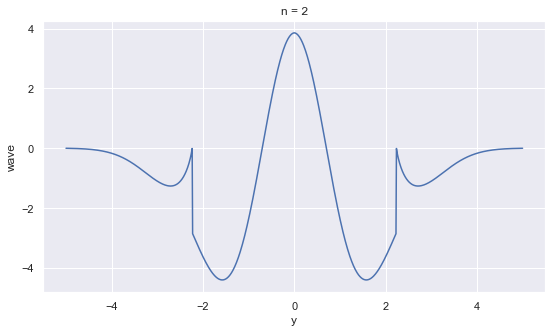

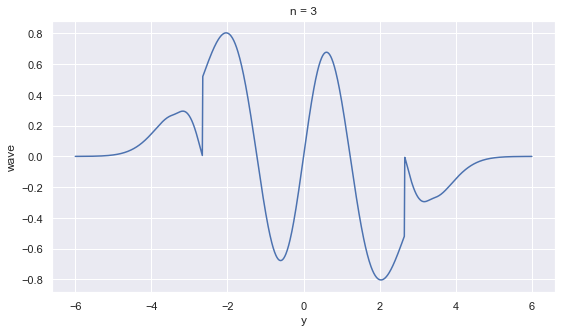

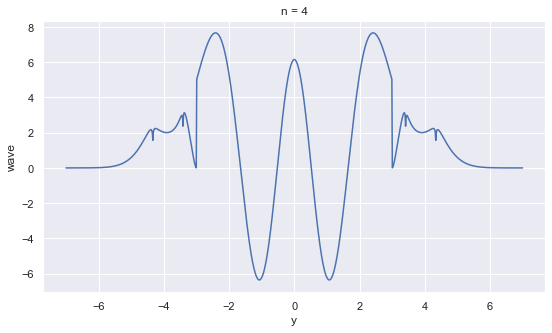

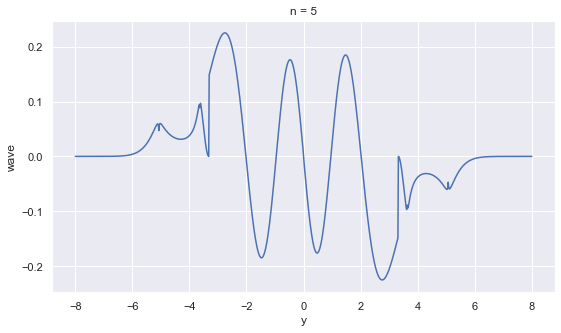

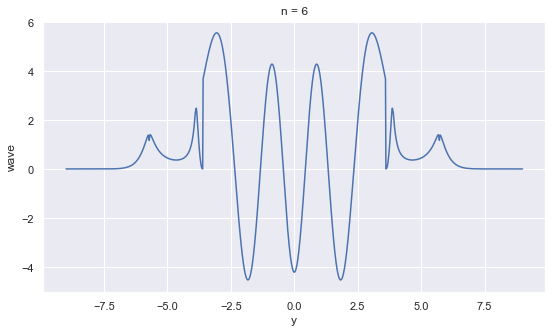

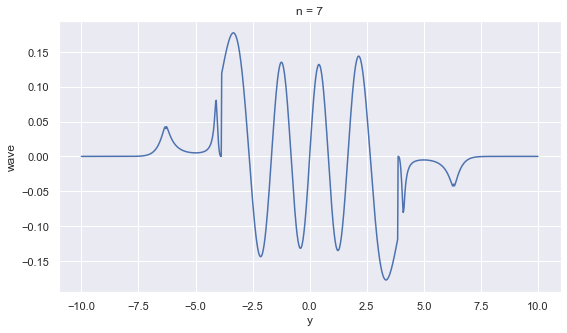

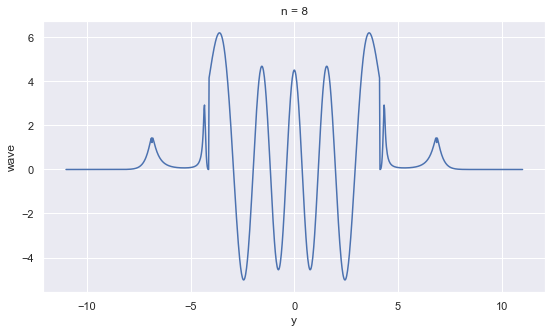

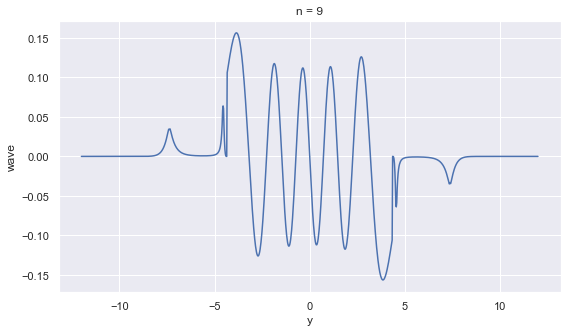

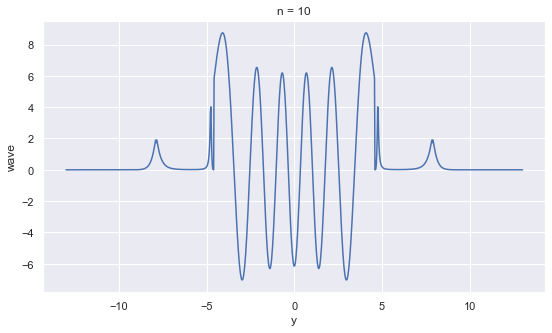

In [9]:
#let's plot this
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imsave
from skimage.io import call_plugin, use_plugin, find_available_plugins
use_plugin('imageio')
# ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

for l in range(1, 11):
    n = l # уровень
    c = 3

    y = np.linspace(-(n + c), n + c, 1000)
    wave = []
    if n % 2 == 0:
        for i in y:
            wave.append(wave_s(n, np.abs(i)))
    else:
        for i in y:
            wave.append(np.sign(i) * wave_a(n, np.abs(i)))

    wave = np.array(wave)
    data = pd.DataFrame(np.array([y, wave]).T, columns=['y', 'wave'])

    f, ax = plt.subplots(figsize=(9, 5))
    plt.title('n = {}'.format(n))
    sns.lineplot(x="y", y="wave", data=data, ax=ax)
    f.savefig('Airy_{}.jpg'.format(n))